unique row_id: 79300, total repeated occurance: 10758


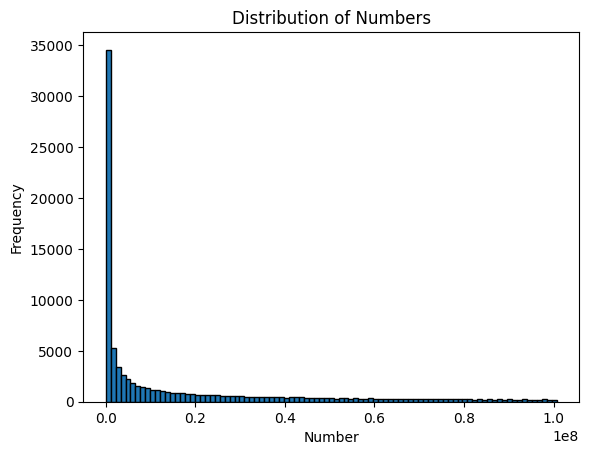

In [5]:
import re
import matplotlib.pyplot as plt
from collections import Counter

# Read the file
with open('./host_record.log', 'r') as file:
    data = file.read()

# Extract all numbers
numbers = [int(num) for num in re.findall(r'\d+', data)]

# Count the occurrences of each number
counter = Counter(numbers)

a = [count for _, count, in counter.items() if count > 1]
print(f"unique row_id: {len(counter.items())}, total repeated occurance: {sum(a)}")

# Plot the distribution
plt.hist(numbers, bins='auto', edgecolor='black')
plt.title('Distribution of Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Save the figure
# plt.savefig('distribution.png')
plt.show()

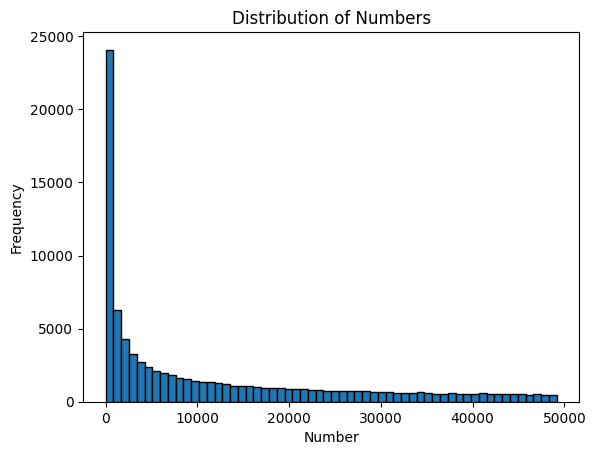

In [2]:
import re
import matplotlib.pyplot as plt
from collections import Counter

# Read the file
with open('./sniper_record.log', 'r') as file:
    data = file.read()

# Extract all numbers
numbers = [int(num) for num in re.findall(r'\d+', data)]

# Count the occurrences of each number
counter = Counter(numbers)

# Print the counts
for num, count in counter.items():
    print(f'Number {num} occurs {count} times')

# Plot the distribution
plt.hist(numbers, bins='auto', edgecolor='black')
plt.title('Distribution of Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Save the figure
# plt.savefig('distribution.png')
plt.show()

100000 numbers fall in the smallest 5%.


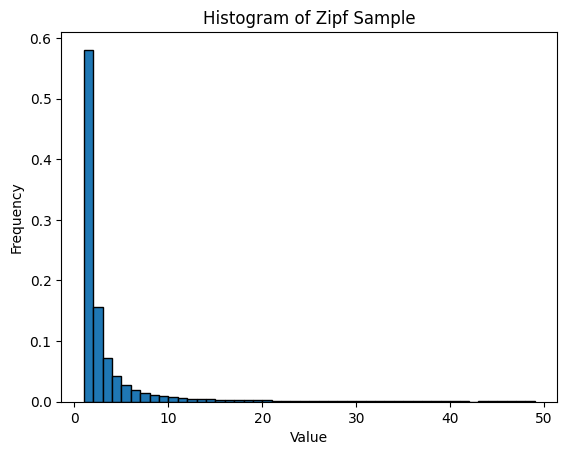

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample of 100000 numbers following a Zipf distribution with theta=0.9
sample = np.random.zipf(1 + 0.9, 100000)

# Sort the sample
sorted_sample = np.sort(sample)

# Select the smallest 10%
smallest_10_percent = sorted_sample[:int(0.05 * max(sorted_sample))]

# Count how many numbers fall in the smallest 10%c
count = len(smallest_10_percent)
print(f'{count} numbers fall in the smallest 5%.')

# Plot the histogram of the sample
plt.hist(sample, bins=range(1, 50), edgecolor='black', density=True)
plt.title('Histogram of Zipf Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [3]:
import pickle
def load_state():
    # Load the runtime state from a pickle file
    with open('runtime_state.pkl', 'rb') as f:
        state = pickle.load(f)
    print(f"Recovered state: {state}")
    return state

state = load_state()
jumpto = int(state["cnt"])

with open('runtime_state.pkl', 'wb') as f:
    pickle.dump({'cnt': int(state["cnt"]) + 1, 'time': str(state['time'])}, f)

Recovered state: {'cnt': 92, 'time': '20240522-224119'}


In [29]:
import re

def parse_log(log_path):
    data = []
    current_section = None
    current_data = None
    toggle = False
    with open(log_path, 'r') as f:
        for line in f:
            if "Estimated CPU_FREQ" in line: 
                toggle = True
            if "[RECORD-TRACE]" in line:
                toggle = False
            if not toggle:
                continue
            if 'Status:' in line:
                if current_data is not None:
                    data.append(current_data)
                line = line.replace('Status:', '')
                current_section = '-'.join([item for item in line.split(' ') if item.strip()])
                current_section = current_section.lower().replace(' ', '-')
                current_data = {current_section: {}}
            else:
                parts = re.split(', | ', line)
                for i, part in enumerate(parts):
                    if ':' in part:
                        key, _ = part.split(':')
                        if key.strip() == '':
                            continue
                        value = parts[i + 1]
                        if '/' in value:
                            value = float(value.split('/')[0]) / float(value.split('/')[1])
                        else: 
                            value = float(value)
                        current_data[current_section][key.lower().replace(' ', '-')] = value

        if current_data is not None:
            data.append(current_data)

    transposed_data = {}

    for section in data:
        for section_name, kv_pairs in section.items():
            if section_name not in transposed_data:
                transposed_data[section_name] = {}
            for key, value in kv_pairs.items():
                if key not in transposed_data[section_name]:
                    transposed_data[section_name][key] = []
                transposed_data[section_name][key].append(value)
    return transposed_data

log_path = "/home/wangzhao/experiments/DBx1000/sniper-results/20240528-211236_tput_tpcc/20240528-211236_sniper_rundb_TPCC_OCC_LOG_NO_-p1_-n64_-Tp0.5_-Gx50_-t64_-Ln1_CC_847_MEM_456_PRIMITIVE_CXTNL_NNODE_8_THREAD_PER_NODE_8.log"
datas = parse_log(log_path)
import pprint as pp
pp.pprint(datas)
# for data in datas:
#     for key, value in data.items():
#         print(f'{key}')
#         # print(f'{"-" * len(key)}')
#         # print(len(value))
#         for k, v in value.items():
#             print(f'  {k}: {v}')

{'benchmark': {'flush': [2855.0,
                         2693.0,
                         2922.0,
                         2661.0,
                         2819.0,
                         2630.0,
                         2736.0,
                         2754.0],
               'inv': [19215.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               'raw': [226.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               'read': [175518.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               'write': [968.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
 'cache-bloom-filter': {'add': [175518.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        'check': [127651.0,
                                  14777.0,
                                  16116.0,
                                  14580.0,
                                  15508.0,
                                  14395.0,
                                  15022.0,
                                  15123.0],
                        'fail': [13.0,

In [1]:
import pickle
with open('runtime_state.pkl', 'rb') as f:
    state = pickle.load(f)
    print(f"Recovered state: {state}")
    jumpto = int(state['cnt'])
    strnow = str(state['time'])
with open('runtime_state.pkl', 'wb') as f:
    pickle.dump({'cnt': 13, 'time': strnow}, f)

Recovered state: {'cnt': 8, 'time': '20240605-135330'}
